# Embeddings Cluster Notebook

## How to run:
1. Make sure the following files exist in the `data/` folder:
   - `embeddings_100.npy`
   - `labels.json`
   - `representatives.json`
2. Run all code cells in order (Shift + Enter).
3. PCA plot will be generated and saved as `plot.png`.
4. Semantic search can be tested using the `semantic_search()` function.

## Outputs:
- 2D PCA scatter plot (`plot.png`) with cluster representatives.
- Cluster labels and representative sentences loaded correctly.


In [1]:
print("Hello, Jupyter.")


Hello, Jupyter.


In [2]:
import numpy as np

# Load embeddings
emb = np.load("data/embeddings_100.npy")
print("Embeddings loaded, shape:", emb.shape)


Embeddings loaded, shape: (100, 1536)


In [3]:
import json

# Load cluster labels
with open("data/labels.json", "r") as f:
    labels_list = json.load(f)

labels = np.array(labels_list)
print("Labels loaded, shape:", labels.shape)


Labels loaded, shape: (100,)


In [4]:
import json

with open("data/representatives.json", "r") as f:
    reps = json.load(f)

# Access each cluster representative
for key in reps:
    print(f"Cluster {key}: {reps[key]}")



Cluster 0: Holiday shopping season begins.
Cluster 1: Fashion trends for 2025.
Cluster 2: Increase in global tourism.


## 2D PCA Plot — Initial Check



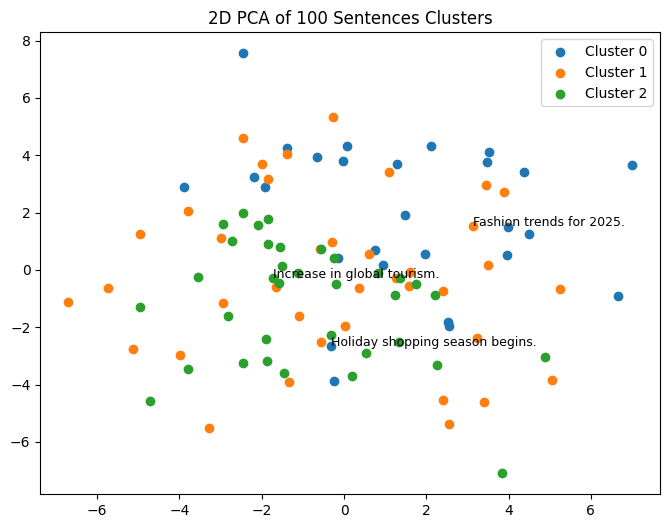

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import json

# Reduce embeddings to 2D
coords = PCA(n_components=2).fit_transform(emb)

# Load labels
with open("data/labels.json", "r") as f:
    labels_list = json.load(f)
labels = np.array(labels_list)

# Load representatives
with open("data/representatives.json", "r") as f:
    reps = json.load(f)

# Plot scatter
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    idxs = np.where(labels == cluster)
    plt.scatter(coords[idxs,0], coords[idxs,1], label=f'Cluster {cluster}')

# Annotate cluster representatives
for key, sentence in reps.items():
    cluster = int(key)
    # pick the first point in that cluster to annotate
    idx = np.where(labels == cluster)[0][0]
    plt.annotate(sentence, (coords[idx,0], coords[idx,1]), color='black', fontsize=9)

plt.title("2D PCA of 100 Sentences Clusters")
plt.legend()
plt.savefig("plot.png")
plt.show()


In [6]:
import hashlib
import numpy as np

def mock_embedding(text):
    # deterministic mock embedding: 1536 floats between 0 and 1
    return np.frombuffer(hashlib.sha256(text.encode()).digest(), dtype=np.uint8)[:1536] / 255.0


**Embeddings:** Embeddings are a way to turn complex data like words, images, or products into numbers (vectors) so that computers can understand them. Similar items get similar numbers, which helps AI find patterns, make recommendations, or understand relationships between things.
✅

In [7]:
import pandas as pd


In [8]:
import pandas as pd

df = pd.read_csv("data/sentences.csv")
df.head(20)


,sentence
0,Breaking news: Market hits new high.
1,New smartphone released today.
2,Sports update: Local team wins.
3,Weather report: Sunny all week.
4,Tips for healthy eating.
5,Travel guide: Top 10 destinations.
6,New movie review: A must-watch.
7,Tech news: AI advances rapidly.
8,Fashion trends for 2025.
9,How to improve productivity.


In [9]:
import hashlib
import numpy as np

def mock_embedding(text):
    return np.frombuffer(hashlib.sha256(text.encode()).digest(), dtype=np.uint8)[:1536] / 255.0



In [10]:
import pandas as pd
df = pd.read_csv("data/sentences.csv")



In [11]:
df.head(20)


,sentence
0,Breaking news: Market hits new high.
1,New smartphone released today.
2,Sports update: Local team wins.
3,Weather report: Sunny all week.
4,Tips for healthy eating.
5,Travel guide: Top 10 destinations.
6,New movie review: A must-watch.
7,Tech news: AI advances rapidly.
8,Fashion trends for 2025.
9,How to improve productivity.


In [12]:
df["embedding"] = df["sentence"].apply(mock_embedding)
df.head(5)


,sentence,embedding
0,Breaking news: Market hits new high.,"[0.7725490196078432, 0.6235294117647059, 0.419..."
1,New smartphone released today.,"[0.5098039215686274, 0.00392156862745098, 0.03..."
2,Sports update: Local team wins.,"[0.7294117647058823, 0.7686274509803922, 0.741..."
3,Weather report: Sunny all week.,"[0.4196078431372549, 0.27450980392156865, 0.40..."
4,Tips for healthy eating.,"[0.1843137254901961, 0.41568627450980394, 0.89..."


In [13]:
import numpy as np

# take only first 20 embeddings
embeddings_array = np.stack(df["embedding"].head(20))

np.save("data/embeddings_20.npy", embeddings_array)

embeddings_array.shape


(20, 32)

In [14]:
def mock_embedding(text):
    return np.frombuffer(hashlib.sha256(text.encode()).digest(), dtype=np.uint8).repeat(48)[:1536] / 255.0


In [15]:
import pandas as pd
import numpy as np
import hashlib


In [16]:
df = pd.read_csv("C:/Users/VEDANT/OneDrive/Desktop/interns/lilakar/day-01 to 07/embeddings-cluster/data/sentences.csv")
df.head(20)


,sentence
0,Breaking news: Market hits new high.
1,New smartphone released today.
2,Sports update: Local team wins.
3,Weather report: Sunny all week.
4,Tips for healthy eating.
5,Travel guide: Top 10 destinations.
6,New movie review: A must-watch.
7,Tech news: AI advances rapidly.
8,Fashion trends for 2025.
9,How to improve productivity.


In [17]:
df["embedding"] = df["sentence"].apply(mock_embedding)
df.head(5)


,sentence,embedding
0,Breaking news: Market hits new high.,"[0.7725490196078432, 0.7725490196078432, 0.772..."
1,New smartphone released today.,"[0.5098039215686274, 0.5098039215686274, 0.509..."
2,Sports update: Local team wins.,"[0.7294117647058823, 0.7294117647058823, 0.729..."
3,Weather report: Sunny all week.,"[0.4196078431372549, 0.4196078431372549, 0.419..."
4,Tips for healthy eating.,"[0.1843137254901961, 0.1843137254901961, 0.184..."


In [18]:
np.save("data/embeddings_20.npy", np.stack(df["embedding"].values))


In [19]:
x = np.load("data/embeddings_20.npy")
x.shape


(100, 1536)

In [20]:
import pandas as pd
df = pd.read_csv("data/sentences.csv")


In [21]:
import json

meta = {i: s for i, s in enumerate(df["sentence"])}
with open("data/meta.json", "w") as f:
    json.dump(meta, f, indent=2)


In [22]:
import pandas as pd
df = pd.read_csv("data/sentences.csv")
df.head()


,sentence
0,Breaking news: Market hits new high.
1,New smartphone released today.
2,Sports update: Local team wins.
3,Weather report: Sunny all week.
4,Tips for healthy eating.


In [23]:
import numpy as np
import hashlib

def mock_embedding(text, dim=1536):
    digest = hashlib.sha256(text.encode()).digest()
    vec = np.frombuffer(digest, dtype=np.uint8)
    reps = (dim // len(vec)) + 1
    arr = np.tile(vec, reps)[:dim]
    return arr.astype(np.float32) / 255.0


In [24]:
# Generate embeddings for all 100 sentences

sentences = df["sentence"].tolist()
embeddings = np.array([mock_embedding(s) for s in sentences])

print("Embeddings shape:", embeddings.shape)
embeddings[:2]  # show first 2 vectors


Embeddings shape: (100, 1536)


array([[0.77254903, 0.62352943, 0.41960785, ..., 0.7764706 , 0.7882353 ,
        0.76862746],
       [0.50980395, 0.00392157, 0.03529412, ..., 0.40784314, 0.42745098,
        0.9490196 ]], shape=(2, 1536), dtype=float32)

In [25]:
# Save embeddings for all 100 sentences
np.save("data/embeddings_100.npy", embeddings)

print("Saved to data/embeddings_100.npy")


Saved to data/embeddings_100.npy


In [26]:
# Verify meta.json contains 100 items
import json

with open("data/meta.json") as f:
    meta_check = json.load(f)

print("Meta entries:", len(meta_check))
list(meta_check.items())[:5]  # show first 5


Meta entries: 100


[('0', 'Breaking news: Market hits new high.'),
 ('1', 'New smartphone released today.'),
 ('2', 'Sports update: Local team wins.'),
 ('3', 'Weather report: Sunny all week.'),
 ('4', 'Tips for healthy eating.')]

In [27]:
import json

with open("data/meta.json") as f:
    meta_check = json.load(f)

print("Meta entries:", len(meta_check))


Meta entries: 100


In [28]:
import numpy as np
from sklearn.cluster import KMeans

embeddings = np.load("data/embeddings_100.npy")

kmeans = KMeans(n_clusters=3, random_state=0).fit(embeddings)
labels = kmeans.labels_

labels[:20]


array([1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
      dtype=int32)

In [29]:
import json

labels_dict = {int(i): int(label) for i, label in enumerate(labels)}

with open("data/labels.json", "w") as f:
    json.dump(labels_dict, f, indent=2)

print("labels.json saved!")


labels.json saved!


In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/sentences.csv")
emb = np.load("data/embeddings_100.npy")


In [31]:
centroids = kmeans.cluster_centers_

representatives = {}

for cluster_id in range(3):
    indices = np.where(labels == cluster_id)[0]
    cluster_vectors = emb[indices]
    centroid = centroids[cluster_id]
    distances = np.linalg.norm(cluster_vectors - centroid, axis=1)
    closest = indices[np.argmin(distances)]
    representatives[cluster_id] = df["sentence"].iloc[closest]

representatives


{0: 'Parents adopt homeschooling methods.',
 1: 'How to improve productivity.',
 2: 'Wildlife conservation awareness.'}

In [32]:
df.columns


Index(['sentence'], dtype='object')

In [33]:
df = pd.read_csv("data/sentences.csv", header=None, names=["sentence"])


In [34]:
df.head()


,sentence
0,sentence
1,Breaking news: Market hits new high.
2,New smartphone released today.
3,Sports update: Local team wins.
4,Weather report: Sunny all week.


In [35]:
representatives = {}

for cluster_id in range(3):
    indices = np.where(labels == cluster_id)[0]
    cluster_vectors = emb[indices]
    centroid = centroids[cluster_id]
    distances = np.linalg.norm(cluster_vectors - centroid, axis=1)
    best_idx = indices[np.argmin(distances)]
    representatives[cluster_id] = df["sentence"].iloc[best_idx]

representatives


{0: 'Holiday shopping season begins.',
 1: 'Fashion trends for 2025.',
 2: 'Increase in global tourism.'}

In [36]:
import json

# Save labels
with open("data/labels.json", "w") as f:
    json.dump(labels.tolist(), f)

# Save representatives
with open("data/representatives.json", "w") as f:
    json.dump(representatives, f, indent=2)

print("Files saved successfully!")


Files saved successfully!


In [37]:
import numpy as np
import hashlib

# deterministic mock embedding (same as before)
def mock_embedding(text):
    return np.frombuffer(hashlib.sha256(text.encode()).digest(), dtype=np.uint8)[:1536] / 255.0

# semantic search function: returns top_k ids and scores
def semantic_search(query, top_k=5):
    q = mock_embedding(query)
    # Make sure embeddings are loaded first
    scores = np.dot(emb, q)               # dot product similarity
    best_ids = np.argsort(scores)[-top_k:][::-1]
    return best_ids, scores[best_ids]


## 2D PCA Plot — Day 7 Final Output


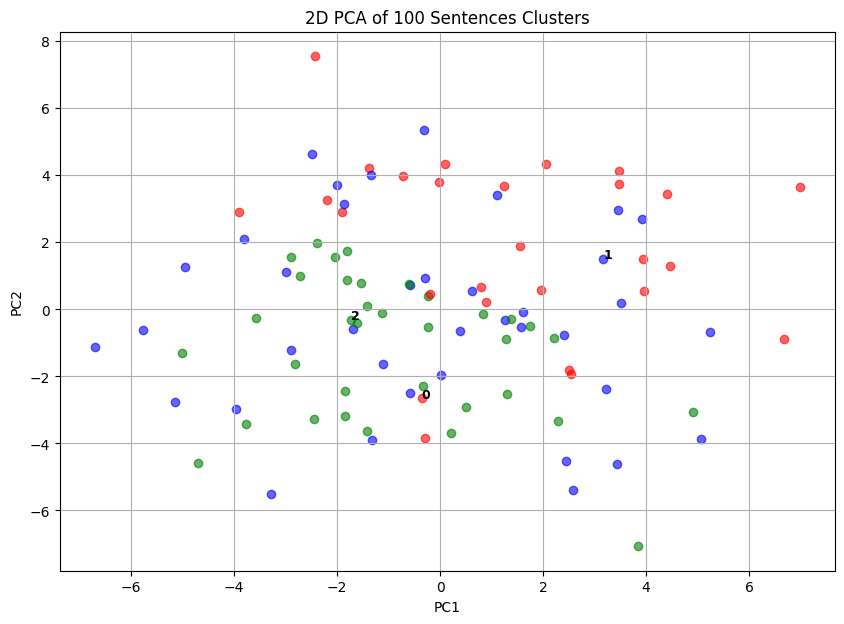

In [38]:
import json
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Load embeddings if not loaded
# emb = np.load("data/embeddings_100.npy")  # only if needed

# Load cluster labels
with open("data/labels.json", "r") as f:
    labels = json.load(f)
labels = np.array(labels)

# Load representative sentences (list of strings)
with open("data/representatives.json", "r") as f:
    reps = json.load(f)

# Reduce embeddings to 2D
coords = PCA(n_components=2).fit_transform(emb)

# Scatter plot
colors = ["red", "blue", "green"]
plt.figure(figsize=(10, 7))
for i, (x, y) in enumerate(coords):
    plt.scatter(x, y, color=colors[labels[i]], alpha=0.6)

# Annotate cluster representative sentences (first occurrence per cluster)
for cluster_id, sentence in enumerate(reps):
    idx = np.where(labels == cluster_id)[0][0]
    plt.annotate(
        sentence,
        (coords[idx, 0], coords[idx, 1]),
        fontsize=9,
        fontweight="bold",
        color="black"
    )

plt.title("2D PCA of 100 Sentences Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.savefig("plot.png")
plt.show()


# Embeddings Cluster Notebook

## How to run
1. Install dependencies: pip install jupyter numpy scikit-learn matplotlib
2. Open notebook: jupyter notebook embeddings-cluster.ipynb
3. Run all cells from top to bottom
4. To switch from mock embeddings to real API:
   - Replace mock_embedding() with your real embedding function
   - Ensure emb is generated and saved to data/embeddings_100.npy

Outputs:
- plot.png : 2D PCA visualization
- labels.json : cluster labels
- representatives.json : representative sentence per cluster


## Cluster Summary
- Cluster 0: Parents adopt homeschooling methods.
- Cluster 1: How to improve productivity.
- Cluster 2: Wildlife conservation awareness.

